# Scatterplots of active region statistics: Cycle 23

### Preamble

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcol
import matplotlib.cm as cm
import itertools
import pandas as pd
from scipy import stats
%matplotlib inline 

# Font Size

font = {'family': 'sans-serif',
        'weight': 'normal',
        'size'   : 17}

plt.rc('font', **font)


A = np.fromfile('axcollect_threecycles.dat',dtype=np.float32)
A = A.reshape(951,164)

N = np.fromfile('npole_correct.dat',dtype=np.float32)
N = N.reshape(951,164)

S = np.fromfile('spole_correct.dat',dtype=np.float32)
S = S.reshape(951,164)

axdipole2 = np.fromfile('axdipole2_threecycles.dat',dtype=np.float32)
realaxdipole = np.fromfile('realaxdipole.dat',dtype=np.float32)

start = []
start_npole = []
start_spole = []
begin = []
begin_npole = []
begin_spole = []

for i in range(951):
    index = np.nonzero(A[i,:])
    start.append(index[0][0])
    begin.append(A[i,start[i]])
    index_npole = np.nonzero(A[i,:]);
    start_npole.append(index_npole[0][0]);
    begin_npole.append(N[i,start_npole[i]]);
    index_spole = np.nonzero(S[i,:]);
    start_spole.append(index_spole[0][0]);
    begin_spole.append(S[i,start_spole[i]]);
    
start = np.asarray(start)
start_npole = np.asarray(start_npole)
start_spole = np.asarray(start_spole)
begin = np.asarray(begin)
begin_npole = np.asarray(begin_npole)
begin_spole = np.asarray(begin_spole)

final = A[:,163]
final[0] = 1e-7
begin[0] = 1e-7
begin_rel = begin/(axdipole2[163]-axdipole2[0])
final_rel = final/(axdipole2[163]-axdipole2[0])
final_npole = N[:,163]
final_spole = S[:,163]

total = []
total_npole = []
total_spole = []
for i in range(164):
    total.append(sum(A[:,i]))
    total_npole.append(sum(N[:,i]))
    total_spole.append(sum(S[:,i]))

thresh = 2.4e-2;
strong = np.asarray(np.where(abs(final)>thresh))
weak = np.asarray(np.where(abs(final)<thresh))
reg_percent = strong.size/951*100;
#print(reg_percent)

thresh_npole = 2.4e-2;
strong_npole = np.asarray(np.where(abs(final_npole)>thresh_npole))
weak_npole = np.asarray(np.where(abs(final_npole)<thresh_npole))
reg_percent_npole = strong_npole.size/951*100;
#print(reg_percent_npole)

thresh_spole = 2.4e-2;
strong_spole = np.asarray(np.where(abs(final_spole)>thresh_spole))
weak_spole = np.asarray(np.where(abs(final_spole)<thresh_spole))
reg_percent_spole = strong_spole.size/951*100;
#print(reg_percent_spole)

initflux = np.fromfile('initflux_threecycles.dat',dtype=np.float32)
initflux2 = np.fromfile('initflux2_threecycles.dat',dtype=np.float32)
reg_lat = np.fromfile('reg_lat_threecycles.dat',dtype=np.float32)
angle = np.fromfile('angle_collect.dat',dtype=np.float32)

a = [(initflux),(initflux2),(reg_lat),(start),(final_rel),(angle),(begin),(begin_rel),(final)]
a = np.asarray(a)
a = np.transpose(a)
b = sorted(a, key=lambda column: np.abs(column[4]))
b = np.transpose(b)

c = sorted(a, key=lambda column: np.abs(column[1]))
c = np.transpose(c)

d = sorted(a, key=lambda column: np.abs(column[2]))
d = np.transpose(d)

### Plots

/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


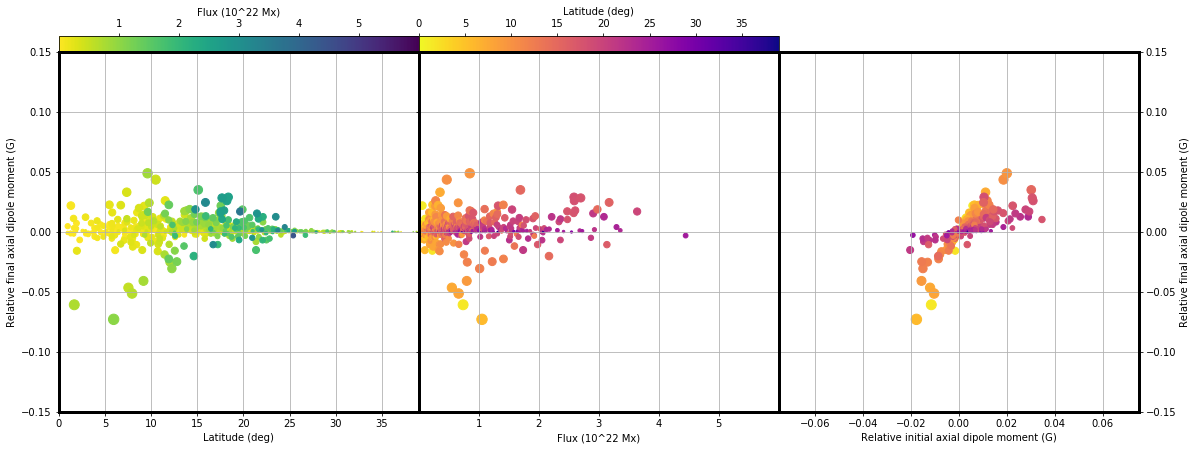

In [2]:
brown = (80/255,60/255,0)
green = (81/255,178/255,76/255)
blue = (114/255,178/255,229/255)
purple = (111/255,40/255,124/255)
peach = (1,208/255,171/255)
orange = (255/255,161/255,0)
pink = (255/255,105/255,180/255)
plum = (238/255,174/255,238/255)

dpi = 300
pxx = 1500  # Horizontal size of each panel
pxy = 1500    # Vertical size of each panel

nph = 1      # Number of horizontal panels
npv = 3      # Number of vertical panels

# Padding
padv  = 200 #Vertical padding in pixels at the edge of figure
padv2 = 0 #Vertical padding in pixels between panels
padh  = 450 #Horizontal padding in pixels at the edge of the figure
padh2 = 0 #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in inches
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in inches

# Conversion to relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszv     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszv    #Horizontal padding between panels in relative units

## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi))

# Latitude Limits
lat1 = 0
lat2 = 39

latticks = np.arange(lat1,lat2,5)

# Flux Limits
fl1 = 0
fl2 = 6

fluxticks = np.arange(1,fl2,1)

#Size Factor
szf = 400


# Add colorbar axes
cbaxes1 = fig.add_axes([ppadh, ppadv+pxy/fszv, pxx/fszh, ppadv/3])
cbaxes2 = fig.add_axes([ppadh+pxx/fszh, ppadv+pxy/fszv, pxx/fszh, ppadv/3])

# Latitude vs. Final Dipole
ax1 = fig.add_axes([ppadh, ppadv, pxx/fszh, pxy/fszv])
im1 = ax1.scatter(abs(c[2]),c[4],szf*np.sqrt(abs(c[4])),abs(c[1])/1e22,cmap='viridis_r',vmin=fl1,vmax=fl2)
ax1.set_xlabel('Latitude (deg)')
ax1.set_xlim(lat1,lat2)
#ax1.set_title('Coloured by flux, sized by RFADM')
ax1.set_ylabel('Relative final axial dipole moment (G)')
ax1.grid()
ax1.set_xticks(latticks)

# Flux vs. Final Dipole
ax2 = fig.add_axes([ppadh+pxx/fszh, ppadv, pxx/fszh, pxy/fszv], sharey=ax1)
ax2.scatter(abs(c[1])/1e22,c[4],szf*np.sqrt(abs(c[4])),abs(c[2]),cmap='plasma_r',vmin=lat1,vmax=lat2)
ax2.set_xlabel('Flux (10^22 Mx)')
ax2.set_xlim(fl1,fl2)
ax2.set_ylim(-0.1,0.1)

#ax2.set_title('Coloured by time, sized by RFADM')
ax2.grid()
ax2.tick_params(labelleft='off') 
ax2.set_xticks(fluxticks)

# Initial Dipole vs. Final Dipole
ax3 = fig.add_axes([ppadh+pxx/fszh*2, ppadv, pxx/fszh, pxy/fszv], sharey=ax1)

im3 = ax3.scatter(c[7],c[4],szf*np.sqrt(abs(c[4])),abs(c[2]),cmap='plasma_r',vmin=lat1,vmax=lat2)
ax3.set_xlabel('Relative initial axial dipole moment (G)')
#ax3.set_title('Coloured by flux, sized by RFADM')
ax3.set_xlim(-0.075,0.075)
ax3.grid()
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.set_ylabel('Relative final axial dipole moment (G)')

# Setting Vertical Axis
ax1.set_ylim(-0.15,0.15)




# Adding Flux Colorbar

cb1 = fig.colorbar(im1,cax=cbaxes1, orientation='horizontal')
cb1.set_label('Flux (10^22 Mx)')
cb1.set_ticks(ax2.get_xticks())
cbaxes1.xaxis.tick_top()
cbaxes1.xaxis.set_label_position('top')


# Adding Latitude Colorbar

cb2 = fig.colorbar(im3,cax=cbaxes2, orientation='horizontal')
cb2.set_label('Latitude (deg)')
cb2.set_ticks(latticks)
cbaxes2.xaxis.tick_top()
cbaxes2.xaxis.set_label_position('top')




# Making Spines Bolder

ax1.spines['bottom'].set_linewidth(3) 
ax1.spines['top'].set_linewidth(3)  
ax1.spines['right'].set_linewidth(3) 
ax1.spines['left'].set_linewidth(3) 

ax2.spines['bottom'].set_linewidth(3) 
ax2.spines['top'].set_linewidth(3)  
ax2.spines['right'].set_linewidth(3) 
ax2.spines['left'].set_linewidth(3) 

ax3.spines['bottom'].set_linewidth(3) 
ax3.spines['top'].set_linewidth(3)  
ax3.spines['right'].set_linewidth(3) 
ax3.spines['left'].set_linewidth(3)

#plt.savefig('/home/grads/xsxs53/Documents/phd/Papers/regions_axd/c23_3panel.eps', format='eps', dpi=300,bbox_inches='tight')


4.856169874896777 -0.0007163274091819515 0.9851427397976585 5.352655480462742e-33 0.1322111295510444


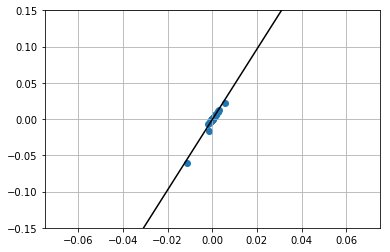

3.0123499845705406 -0.0007958666965453519 0.9669093605819377 6.499879303186615e-88 0.06600554413564594


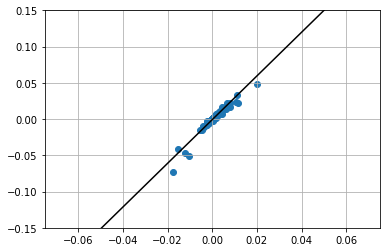

1.8552492122609354 -0.00039731106049902226 0.9656349291161813 4.932093019462961e-126 0.03429504769066913


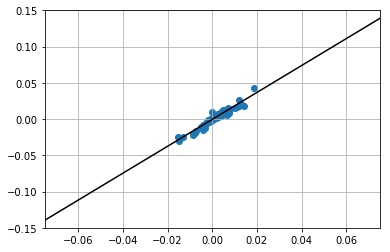

0.7917448905481062 6.857051969045387e-05 0.8619460847580247 1.8753270668304857e-72 0.030124103573869486


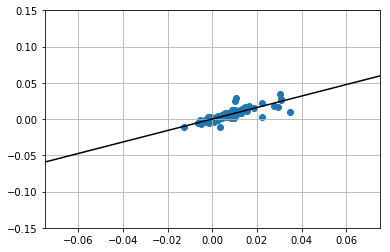

0.4655367440736825 -0.00023756462445789035 0.9196232380611066 4.075684400469728e-72 0.015117996091921094


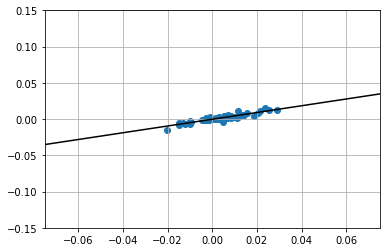

0.12305126210324673 -7.524429343639798e-05 0.8144671547469848 1.0393651935183834e-23 0.009089834605536667


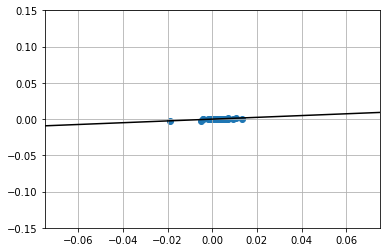

0.04596308899158095 -1.4929918555932928e-05 0.9606602772095197 1.0029860655720054e-13 0.0028329887979209704


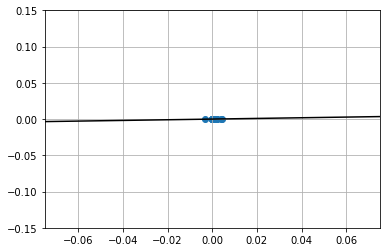

0.008701625720442597 -1.484300359868438e-06 0.9529934332685108 1.6699786116840603e-06 0.0008748631998722147


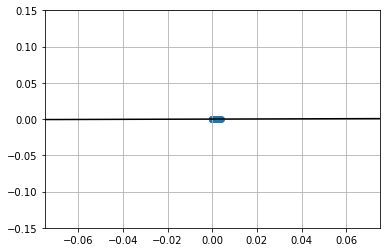

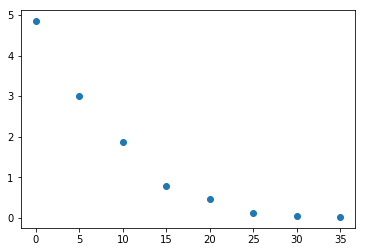

In [3]:
slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[np.abs(reg_lat)<5],final_rel[np.abs(reg_lat)<5])
initials = np.linspace(-0.075,0.075,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[np.abs(reg_lat)<5],final_rel[np.abs(reg_lat)<5])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.075,0.075)
plt.ylim(-0.15,0.15)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=5) & (np.abs(reg_lat)<10)],final_rel[(np.abs(reg_lat)>=5) & (np.abs(reg_lat)<10)])
initials = np.linspace(-0.075,0.075,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=5) & (np.abs(reg_lat)<10)],final_rel[(np.abs(reg_lat)>=5) & (np.abs(reg_lat)<10)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.075,0.075)
plt.ylim(-0.15,0.15)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=10) & (np.abs(reg_lat)<15)],final_rel[(np.abs(reg_lat)>=10) & (np.abs(reg_lat)<15)])
initials = np.linspace(-0.075,0.075,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=10) & (np.abs(reg_lat)<15)],final_rel[(np.abs(reg_lat)>=10) & (np.abs(reg_lat)<15)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.075,0.075)
plt.ylim(-0.15,0.15)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=15) & (np.abs(reg_lat)<20)],final_rel[(np.abs(reg_lat)>=15) & (np.abs(reg_lat)<20)])
initials = np.linspace(-0.075,0.075,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=15) & (np.abs(reg_lat)<20)],final_rel[(np.abs(reg_lat)>=15) & (np.abs(reg_lat)<20)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.075,0.075)
plt.ylim(-0.15,0.15)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=20) & (np.abs(reg_lat)<25)],final_rel[(np.abs(reg_lat)>=20) & (np.abs(reg_lat)<25)])
initials = np.linspace(-0.075,0.075,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=20) & (np.abs(reg_lat)<25)],final_rel[(np.abs(reg_lat)>=20) & (np.abs(reg_lat)<25)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.075,0.075)
plt.ylim(-0.15,0.15)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=25) & (np.abs(reg_lat)<30)],final_rel[(np.abs(reg_lat)>=25) & (np.abs(reg_lat)<30)])
initials = np.linspace(-0.075,0.075,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=25) & (np.abs(reg_lat)<30)],final_rel[(np.abs(reg_lat)>=25) & (np.abs(reg_lat)<30)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.075,0.075)
plt.ylim(-0.15,0.15)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=30) & (np.abs(reg_lat)<35)],final_rel[(np.abs(reg_lat)>=30) & (np.abs(reg_lat)<35)])
initials = np.linspace(-0.075,0.075,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=30) & (np.abs(reg_lat)<35)],final_rel[(np.abs(reg_lat)>=30) & (np.abs(reg_lat)<35)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.075,0.075)
plt.ylim(-0.15,0.15)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[np.abs(reg_lat)>=35],final_rel[np.abs(reg_lat)>=35])
initials = np.linspace(-0.075,0.075,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[np.abs(reg_lat)>=35],final_rel[np.abs(reg_lat)>=35])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.075,0.075)
plt.ylim(-0.15,0.15)
plt.grid()
plt.show()


slopes = np.array([4.856,3.012,1.855,0.792,0.466,0.123,0.046,0.009])
ranges = np.arange(0,40,5)
plt.scatter(ranges,slopes)
plt.show()

[  3.89692349 211.41333189]


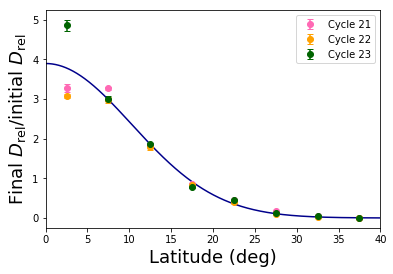

In [4]:
slopes21 = np.array([3.270,3.272,1.852,0.856,0.445,0.173,0.042,0.007])
slopes22 = np.array([3.071,2.969,1.791,0.844,0.397,0.100,0.029,0.010])
slopes23 = np.array([4.856,3.012,1.855,0.792,0.466,0.123,0.046,0.009])
ranges = np.arange(2.5,42.5,5)
plt.errorbar(ranges,slopes21,yerr=(0.100,0.037,0.036,0.034,0.013,0.008,0.006,0.001),color=pink,fmt='o',label='Cycle 21',capsize=3)
plt.errorbar(ranges,slopes22,yerr=(0.052,0.073,0.068,0.022,0.034,0.005,0.002,0.002),color=orange,fmt='o',label='Cycle 22',capsize=3)
plt.errorbar(ranges,slopes23,yerr=(0.132,0.066,0.034,0.030,0.015,0.009,0.003,0.001),color='darkgreen',fmt='o',label='Cycle 23',capsize=3)
plt.xlabel('Latitude (deg)',fontsize=18)
plt.ylabel('Final $D_{\mathrm{rel}}$/initial $D_{\mathrm{rel}}$',fontsize=18)
plt.xlim([0,40])
plt.legend()


def gaussian(x, amp, wid):
    return amp*np.exp(-(x**2)/wid)

from scipy.optimize import curve_fit

x = np.array([2.5,7.5,12.5,17.5,22.5,27.5,32.5,37.5,2.5,7.5,12.5,17.5,22.5,27.5,32.5,37.5,2.5,7.5,12.5,17.5,22.5,27.5,32.5,37.5])
x2 = np.linspace(0,40,1001)
y = np.array([3.270,3.272,1.852,0.856,0.445,0.173,0.042,0.007,3.071,2.969,1.791,0.844,0.397,0.100,0.029,0.010,4.856,3.012,1.855,0.792,0.466,0.123,0.046,0.009])
init_vals = [2, 110]
best_vals, covar = curve_fit(gaussian, x, y, p0=init_vals)
fit1 = gaussian(x2,best_vals[0],best_vals[1])

plt.plot(x2,fit1,color='darkblue')

print(best_vals)


#plt.savefig('/home/grads/xsxs53/Documents/phd/Papers/regions_axd/ratio_scatter.eps', format='eps', dpi=300,bbox_inches='tight')

[  3.76136294 214.21784182]


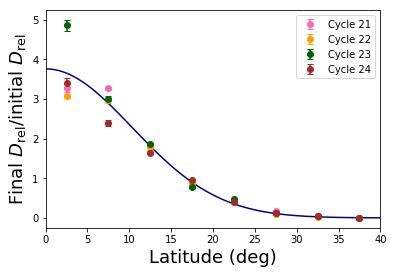

In [5]:
slopes24 = np.array([3.415,2.396,1.648,0.952,0.413,0.113,0.038,0])
plt.errorbar(ranges,slopes21,yerr=(0.100,0.037,0.036,0.034,0.013,0.008,0.006,0.001),color=pink,fmt='o',label='Cycle 21',capsize=3)
plt.errorbar(ranges,slopes22,yerr=(0.052,0.073,0.068,0.022,0.034,0.005,0.002,0.002),color=orange,fmt='o',label='Cycle 22',capsize=3)
plt.errorbar(ranges,slopes23,yerr=(0.132,0.066,0.034,0.030,0.015,0.009,0.003,0.001),color='darkgreen',fmt='o',label='Cycle 23',capsize=3)
plt.errorbar(ranges,slopes24,yerr=(0.118,0.073,0.041,0.026,0.010,0.006,0.007,0.000),color='brown',fmt='o',label='Cycle 24',capsize=3)
plt.xlabel('Latitude (deg)',fontsize=18)
plt.ylabel('Final $D_{\mathrm{rel}}$/initial $D_{\mathrm{rel}}$',fontsize=18)
plt.xlim([0,40])
plt.legend()


def gaussian(x, amp, wid):
    return amp*np.exp(-(x**2)/wid)

from scipy.optimize import curve_fit

x = np.array([2.5,7.5,12.5,17.5,22.5,27.5,32.5,37.5,2.5,7.5,12.5,17.5,22.5,27.5,32.5,37.5,2.5,7.5,12.5,17.5,22.5,27.5,32.5,37.5,2.5,7.5,12.5,17.5,22.5,27.5,32.5,37.5])
x2 = np.linspace(0,40,1001)
y = np.array([3.270,3.272,1.852,0.856,0.445,0.173,0.042,0.007,3.071,2.969,1.791,0.844,0.397,0.100,0.029,0.010,4.856,3.012,1.855,0.792,0.466,0.123,0.046,0.009,3.415,2.396,1.648,0.952,0.413,0.113,0.038,0])
init_vals = [2, 110]
best_vals, covar = curve_fit(gaussian, x, y, p0=init_vals)
fit1 = gaussian(x2,best_vals[0],best_vals[1])

plt.plot(x2,fit1,color='darkblue')

print(best_vals)

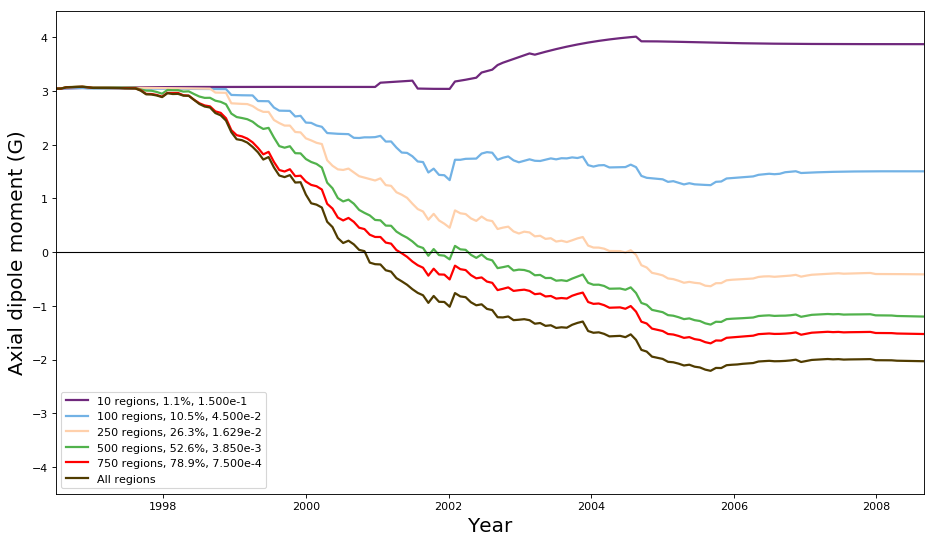

In [6]:
timeyear = (np.arange(1,165)*27.27+152)/365.25+1996

axdipole_10 = np.fromfile('axdipole_10_threecycles.dat',dtype=np.float32)
axdipole_100 = np.fromfile('axdipole_100_threecycles.dat',dtype=np.float32)
axdipole_250 = np.fromfile('axdipole_250_threecycles.dat',dtype=np.float32)
axdipole_500 = np.fromfile('axdipole_500_threecycles.dat',dtype=np.float32)
axdipole_750 = np.fromfile('axdipole_750_threecycles.dat',dtype=np.float32)

fig2 = plt.figure(figsize=(14,8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(timeyear,axdipole_10,color=purple,lw=2,label='10 regions, 1.1%, 1.500e-1')
plt.plot(timeyear,axdipole_100,color=blue,lw=2,label='100 regions, 10.5%, 4.500e-2')
plt.plot(timeyear,axdipole_250,color=peach,lw=2,label='250 regions, 26.3%, 1.629e-2')
plt.plot(timeyear,axdipole_500,color=green,lw=2,label='500 regions, 52.6%, 3.850e-3')
plt.plot(timeyear,axdipole_750,'red',lw=2,label='750 regions, 78.9%, 7.500e-4')
plt.plot(timeyear,axdipole2,color=brown,lw=2,label='All regions')
plt.plot((timeyear[0],timeyear[163]), (0, 0), 'k-',lw=1)
plt.xlim(timeyear[0],timeyear[163])
plt.ylim(-4.5,4.5)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Axial dipole moment (G)',fontsize=18)
plt.legend()
plt.show()

#plt.savefig('/home/grads/xsxs53/Documents/phd/Papers/regions_axd/c23_5profiles.eps', format='eps', dpi=300,bbox_inches='tight')

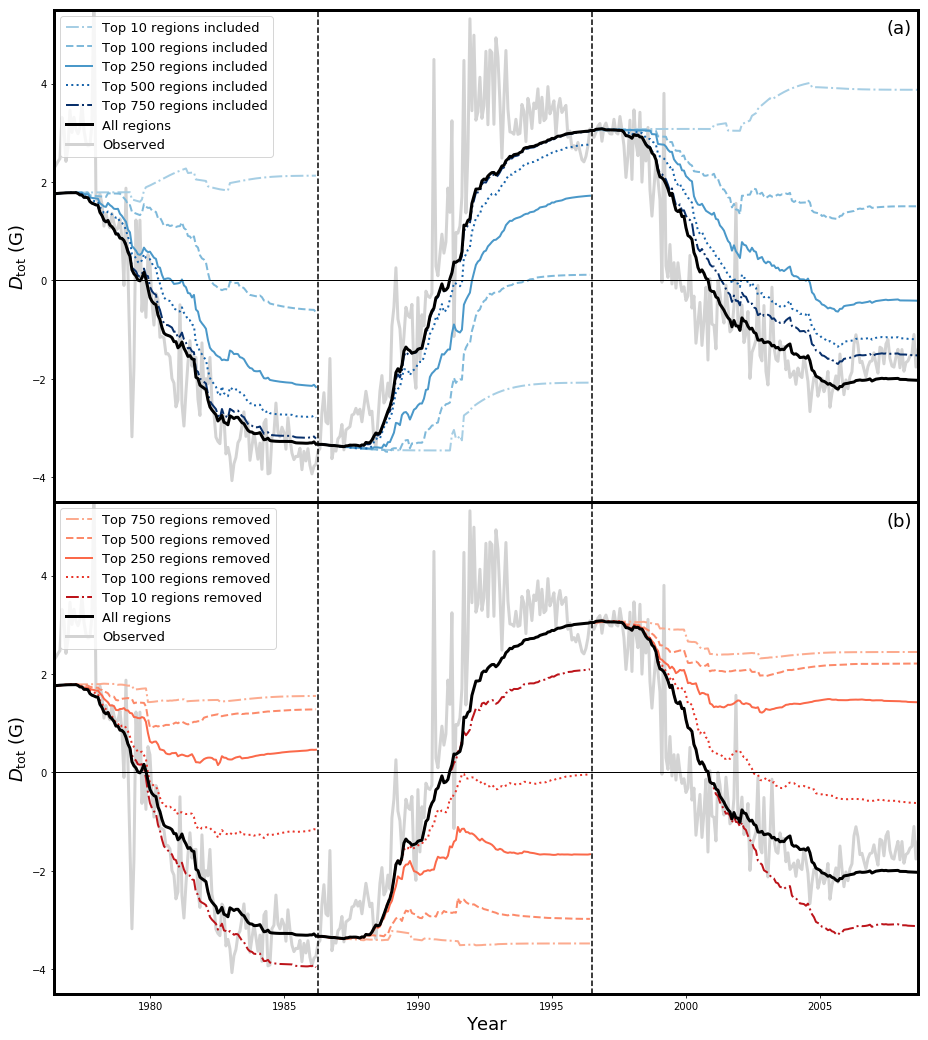

In [7]:
timeyear_c21 = (np.arange(1,133)*27.27+121)/365.25+1976
timeyear_c22 = (np.arange(1,138)*27.27+68)/365.25+1986
timeyear = (np.arange(1,165)*27.27+152)/365.25+1996
timeyear_full = np.concatenate([timeyear_c21,timeyear_c22,timeyear])

dpi = 300
pxx = 3600  # Horizontal size of each panel
pxy = 2050    # Vertical size of each panel

nph = 2      # Number of horizontal panels
npv = 1      # Number of vertical panels

# Padding
padv  = 200 #Vertical padding in pixels at the edge of figure
padv2 = 0 #Vertical padding in pixels between panels
padh  = 450 #Horizontal padding in pixels at the edge of the figure
padh2 = 0 #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in inches
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in inches

# Conversion to relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszv     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszv    #Horizontal padding between panels in relative units

## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi))

axdipole2_c21 = np.fromfile('axdipole2_c21_threecycles.dat',dtype=np.float32)
axdipole_10_c21 = np.fromfile('axdipole_10_c21_threecycles.dat',dtype=np.float32)
axdipole_100_c21 = np.fromfile('axdipole_100_c21_threecycles.dat',dtype=np.float32)
axdipole_250_c21 = np.fromfile('axdipole_250_c21_threecycles.dat',dtype=np.float32)
axdipole_500_c21 = np.fromfile('axdipole_500_c21_threecycles.dat',dtype=np.float32)
axdipole_750_c21 = np.fromfile('axdipole_750_c21_threecycles.dat',dtype=np.float32)

ax1 = fig.add_axes([ppadh, ppadv, pxx/fszh, pxy/fszv])
#ax1.plot(timeyear_c21,axdipole_10_c21,linestyle='',label='INCLUDING:')
ax1.plot(timeyear_c21,axdipole_10_c21,color=cm.Blues(0.35),linestyle='-.',lw=2,label='Top 10 regions included')
ax1.plot(timeyear_c21,axdipole_100_c21,color=cm.Blues(0.45),linestyle='--',lw=2,label='Top 100 regions included')
ax1.plot(timeyear_c21,axdipole_250_c21,color=cm.Blues(0.6),lw=2,label='Top 250 regions included')
ax1.plot(timeyear_c21,axdipole_500_c21,color=cm.Blues(0.8),linestyle=':',lw=2,label='Top 500 regions included')
ax1.plot(timeyear_c21,axdipole_750_c21,color=cm.Blues(1.0),linestyle='-.',lw=2,label='Top 750 regions included')
ax1.plot(timeyear_c21,axdipole2_c21,color='black',lw=3,label='All regions')

axdipole2_c22 = np.fromfile('axdipole2_c22_threecycles.dat',dtype=np.float32)
axdipole_10_c22 = np.fromfile('axdipole_10_c22_threecycles.dat',dtype=np.float32)
axdipole_100_c22 = np.fromfile('axdipole_100_c22_threecycles.dat',dtype=np.float32)
axdipole_250_c22 = np.fromfile('axdipole_250_c22_threecycles.dat',dtype=np.float32)
axdipole_500_c22 = np.fromfile('axdipole_500_c22_threecycles.dat',dtype=np.float32)
axdipole_750_c22 = np.fromfile('axdipole_750_c22_threecycles.dat',dtype=np.float32)

ax1.plot(timeyear_c22,axdipole_10_c22,color=cm.Blues(0.35),linestyle='-.',lw=2)
ax1.plot(timeyear_c22,axdipole_100_c22,color=cm.Blues(0.45),linestyle='--',lw=2)
ax1.plot(timeyear_c22,axdipole_250_c22,color=cm.Blues(0.6),lw=2)
ax1.plot(timeyear_c22,axdipole_500_c22,color=cm.Blues(0.8),linestyle=':',lw=2)
ax1.plot(timeyear_c22,axdipole_750_c22,color=cm.Blues(1.0),linestyle='-.',lw=2)
ax1.plot(timeyear_c22,axdipole2_c22,color='black',lw=3)

axdipole_10 = np.fromfile('axdipole_10_threecycles.dat',dtype=np.float32)
axdipole_100 = np.fromfile('axdipole_100_threecycles.dat',dtype=np.float32)
axdipole_250 = np.fromfile('axdipole_250_threecycles.dat',dtype=np.float32)
axdipole_500 = np.fromfile('axdipole_500_threecycles.dat',dtype=np.float32)
axdipole_750 = np.fromfile('axdipole_750_threecycles.dat',dtype=np.float32)

ax1.plot(timeyear,axdipole_10,color=cm.Blues(0.35),linestyle='-.',lw=2)
ax1.plot(timeyear,axdipole_100,color=cm.Blues(0.45),linestyle='--',lw=2)
ax1.plot(timeyear,axdipole_250,color=cm.Blues(0.6),lw=2)
ax1.plot(timeyear,axdipole_500,color=cm.Blues(0.8),linestyle=':',lw=2)
ax1.plot(timeyear,axdipole_750,color=cm.Blues(1.0),linestyle='-.',lw=2)
ax1.plot(timeyear,axdipole2,color='black',lw=3)
ax1.axvline(x=timeyear_c22[0],color='black',linestyle='--')
ax1.axvline(x=timeyear[0],color='black',linestyle='--')
ax1.plot((timeyear_c21[0],timeyear[163]), (0, 0), 'k-',lw=1)
ax1.plot(timeyear_full,realaxdipole,color='lightgrey',lw=3,zorder=0,label='Observed')
ax1.set_xlim(timeyear_c21[0],timeyear[163])
ax1.set_ylim(-4.5,5.5)
ax1.set_ylabel('$D_{\mathrm{tot}}$ (G)',fontsize=18)
ax1.legend(fontsize=13,loc=2)




axdipole_10_c21 = np.fromfile('axdipole_reverse_10_c21.dat',dtype=np.float32)
axdipole_100_c21 = np.fromfile('axdipole_reverse_100_c21.dat',dtype=np.float32)
axdipole_250_c21 = np.fromfile('axdipole_reverse_250_c21.dat',dtype=np.float32)
axdipole_500_c21 = np.fromfile('axdipole_reverse_500_c21.dat',dtype=np.float32)
axdipole_750_c21 = np.fromfile('axdipole_reverse_750_c21.dat',dtype=np.float32)

ax2 = fig.add_axes([ppadh, ppadv-pxy/fszv, pxx/fszh, pxy/fszv], sharex=ax1)
ax2.plot(timeyear_c21,axdipole_750_c21,color=cm.Reds(0.3),linestyle='-.',lw=2,label='Top 750 regions removed')
ax2.plot(timeyear_c21,axdipole_500_c21,color=cm.Reds(0.4),linestyle='--',lw=2,label='Top 500 regions removed')
ax2.plot(timeyear_c21,axdipole_250_c21,color=cm.Reds(0.5),lw=2,label='Top 250 regions removed')
ax2.plot(timeyear_c21,axdipole_100_c21,color=cm.Reds(0.65),linestyle=':',lw=2,label='Top 100 regions removed')
ax2.plot(timeyear_c21,axdipole_10_c21,color=cm.Reds(0.8),linestyle='-.',lw=2,label='Top 10 regions removed')
ax2.plot(timeyear_c21,axdipole2_c21,color='black',lw=3,label='All regions')

axdipole_10_c22 = np.fromfile('axdipole_reverse_10_c22.dat',dtype=np.float32)
axdipole_100_c22 = np.fromfile('axdipole_reverse_100_c22.dat',dtype=np.float32)
axdipole_250_c22 = np.fromfile('axdipole_reverse_250_c22.dat',dtype=np.float32)
axdipole_500_c22 = np.fromfile('axdipole_reverse_500_c22.dat',dtype=np.float32)
axdipole_750_c22 = np.fromfile('axdipole_reverse_750_c22.dat',dtype=np.float32)

ax2.plot(timeyear_c22,axdipole_750_c22,color=cm.Reds(0.3),linestyle='-.',lw=2)
ax2.plot(timeyear_c22,axdipole_500_c22,color=cm.Reds(0.4),linestyle='--',lw=2)
ax2.plot(timeyear_c22,axdipole_250_c22,color=cm.Reds(0.5),lw=2)
ax2.plot(timeyear_c22,axdipole_100_c22,color=cm.Reds(0.65),linestyle=':',lw=2)
ax2.plot(timeyear_c22,axdipole_10_c22,color=cm.Reds(0.8),linestyle='-.',lw=2)
ax2.plot(timeyear_c22,axdipole2_c22,color='black',lw=3)

axdipole_10 = np.fromfile('axdipole_reverse_10.dat',dtype=np.float32)
axdipole_100 = np.fromfile('axdipole_reverse_100.dat',dtype=np.float32)
axdipole_250 = np.fromfile('axdipole_reverse_250.dat',dtype=np.float32)
axdipole_500 = np.fromfile('axdipole_reverse_500.dat',dtype=np.float32)
axdipole_750 = np.fromfile('axdipole_reverse_750.dat',dtype=np.float32)

ax2.plot(timeyear,axdipole_750,color=cm.Reds(0.3),linestyle='-.',lw=2)
ax2.plot(timeyear,axdipole_500,color=cm.Reds(0.4),linestyle='--',lw=2)
ax2.plot(timeyear,axdipole_250,color=cm.Reds(0.5),lw=2)
ax2.plot(timeyear,axdipole_100,color=cm.Reds(0.65),linestyle=':',lw=2)
ax2.plot(timeyear,axdipole_10,color=cm.Reds(0.8),linestyle='-.',lw=2)
ax2.plot(timeyear,axdipole2,color='black',lw=3)
ax2.plot(timeyear_full,realaxdipole,color='lightgrey',lw=3,zorder=0,label='Observed')
ax2.axvline(x=timeyear_c22[0],color='black',linestyle='--')
ax2.axvline(x=timeyear[0],color='black',linestyle='--')
ax2.plot((timeyear_c21[0],timeyear[163]), (0, 0), 'k-',lw=1)
ax2.set_xlim(timeyear_c21[0],timeyear[163])
ax2.set_ylim(-4.5,5.5)
ax2.set_xlabel('Year',fontsize=18)
ax2.set_ylabel('$D_{\mathrm{tot}}$ (G)',fontsize=18)
ax2.legend(fontsize=13,loc=2)
fig.text(0.612,0.878,'(a)',fontsize=18)
fig.text(0.612,0.04,'(b)',fontsize=18)

ax1.spines['bottom'].set_linewidth(3) 
ax1.spines['top'].set_linewidth(3)  
ax1.spines['right'].set_linewidth(3) 
ax1.spines['left'].set_linewidth(3)
ax2.spines['bottom'].set_linewidth(3) 
ax2.spines['top'].set_linewidth(3)  
ax2.spines['right'].set_linewidth(3) 
ax2.spines['left'].set_linewidth(3)

#plt.savefig('/home/grads/xsxs53/Documents/phd/Papers/regions_axd/5profiles_obs_nodecay_both.eps', format='eps', dpi=300,bbox_inches='tight')

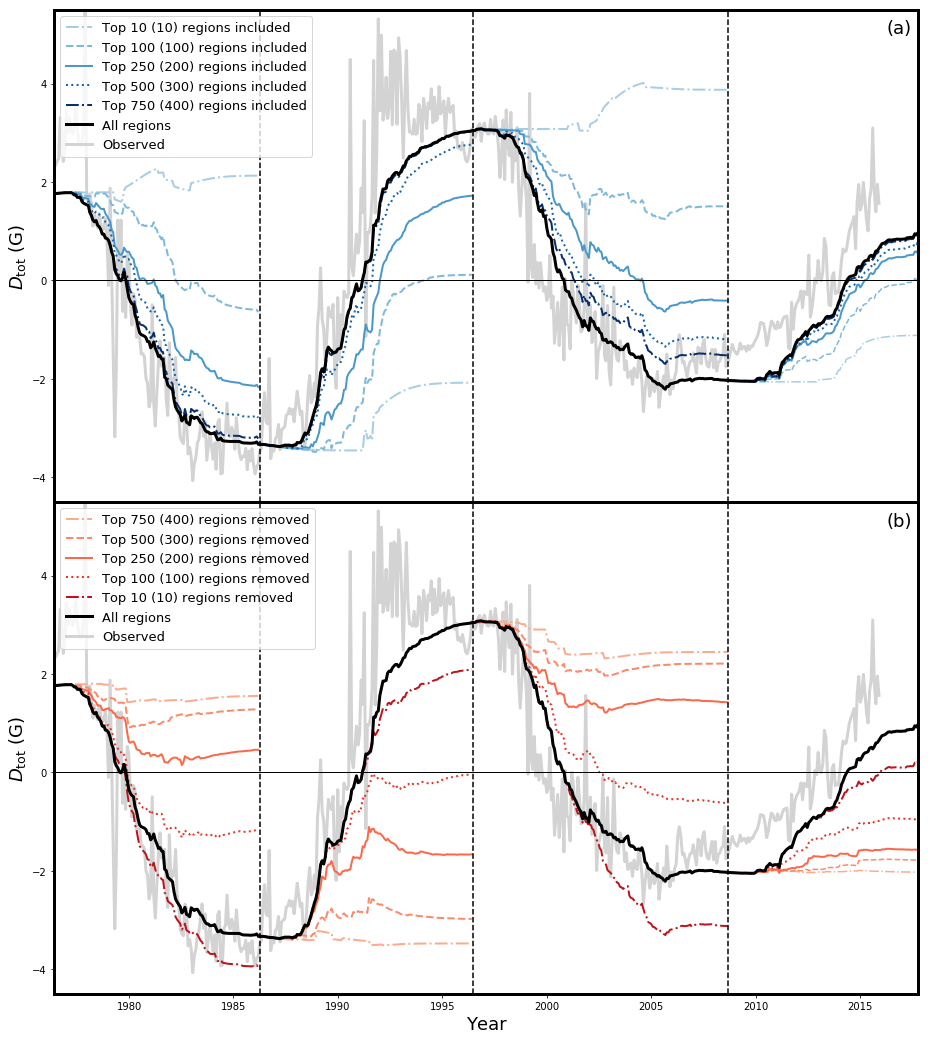

In [8]:
timeyear_c21 = (np.arange(1,133)*27.27+121)/365.25+1976
timeyear_c22 = (np.arange(1,138)*27.27+68)/365.25+1986
timeyear = (np.arange(1,165)*27.27+152)/365.25+1996
timeyear_c24 = (np.arange(1,124)*27.27+215)/365.25+2008
timeyear_short = (np.arange(1,99)*27.27+215)/365.25+2008
timeyear_full = np.concatenate([timeyear_c21,timeyear_c22,timeyear,timeyear_c24])
timeyear_full_short = np.concatenate([timeyear_c21,timeyear_c22,timeyear,timeyear_short])
realaxdipole_c24 = np.fromfile('realaxdipole_c24.dat',dtype=np.float32)
realaxdfull = np.concatenate([realaxdipole,realaxdipole_c24])

dpi = 300
pxx = 3600  # Horizontal size of each panel
pxy = 2050    # Vertical size of each panel

nph = 2      # Number of horizontal panels
npv = 1      # Number of vertical panels

# Padding
padv  = 200 #Vertical padding in pixels at the edge of figure
padv2 = 0 #Vertical padding in pixels between panels
padh  = 450 #Horizontal padding in pixels at the edge of the figure
padh2 = 0 #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in inches
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in inches

# Conversion to relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszv     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszv    #Horizontal padding between panels in relative units

## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi))

axdipole2_c21 = np.fromfile('axdipole2_c21_threecycles.dat',dtype=np.float32)
axdipole_10_c21 = np.fromfile('axdipole_10_c21_threecycles.dat',dtype=np.float32)
axdipole_100_c21 = np.fromfile('axdipole_100_c21_threecycles.dat',dtype=np.float32)
axdipole_250_c21 = np.fromfile('axdipole_250_c21_threecycles.dat',dtype=np.float32)
axdipole_500_c21 = np.fromfile('axdipole_500_c21_threecycles.dat',dtype=np.float32)
axdipole_750_c21 = np.fromfile('axdipole_750_c21_threecycles.dat',dtype=np.float32)

ax1 = fig.add_axes([ppadh, ppadv, pxx/fszh, pxy/fszv])
#ax1.plot(timeyear_c21,axdipole_10_c21,linestyle='',label='INCLUDING:')
ax1.plot(timeyear_c21,axdipole_10_c21,color=cm.Blues(0.35),linestyle='-.',lw=2,label='Top 10 (10) regions included')
ax1.plot(timeyear_c21,axdipole_100_c21,color=cm.Blues(0.45),linestyle='--',lw=2,label='Top 100 (100) regions included')
ax1.plot(timeyear_c21,axdipole_250_c21,color=cm.Blues(0.6),lw=2,label='Top 250 (200) regions included')
ax1.plot(timeyear_c21,axdipole_500_c21,color=cm.Blues(0.8),linestyle=':',lw=2,label='Top 500 (300) regions included')
ax1.plot(timeyear_c21,axdipole_750_c21,color=cm.Blues(1.0),linestyle='-.',lw=2,label='Top 750 (400) regions included')
ax1.plot(timeyear_c21,axdipole2_c21,color='black',lw=3,label='All regions')

axdipole2_c22 = np.fromfile('axdipole2_c22_threecycles.dat',dtype=np.float32)
axdipole_10_c22 = np.fromfile('axdipole_10_c22_threecycles.dat',dtype=np.float32)
axdipole_100_c22 = np.fromfile('axdipole_100_c22_threecycles.dat',dtype=np.float32)
axdipole_250_c22 = np.fromfile('axdipole_250_c22_threecycles.dat',dtype=np.float32)
axdipole_500_c22 = np.fromfile('axdipole_500_c22_threecycles.dat',dtype=np.float32)
axdipole_750_c22 = np.fromfile('axdipole_750_c22_threecycles.dat',dtype=np.float32)

ax1.plot(timeyear_c22,axdipole_10_c22,color=cm.Blues(0.35),linestyle='-.',lw=2)
ax1.plot(timeyear_c22,axdipole_100_c22,color=cm.Blues(0.45),linestyle='--',lw=2)
ax1.plot(timeyear_c22,axdipole_250_c22,color=cm.Blues(0.6),lw=2)
ax1.plot(timeyear_c22,axdipole_500_c22,color=cm.Blues(0.8),linestyle=':',lw=2)
ax1.plot(timeyear_c22,axdipole_750_c22,color=cm.Blues(1.0),linestyle='-.',lw=2)
ax1.plot(timeyear_c22,axdipole2_c22,color='black',lw=3)

axdipole_10 = np.fromfile('axdipole_10_threecycles.dat',dtype=np.float32)
axdipole_100 = np.fromfile('axdipole_100_threecycles.dat',dtype=np.float32)
axdipole_250 = np.fromfile('axdipole_250_threecycles.dat',dtype=np.float32)
axdipole_500 = np.fromfile('axdipole_500_threecycles.dat',dtype=np.float32)
axdipole_750 = np.fromfile('axdipole_750_threecycles.dat',dtype=np.float32)

ax1.plot(timeyear,axdipole_10,color=cm.Blues(0.35),linestyle='-.',lw=2)
ax1.plot(timeyear,axdipole_100,color=cm.Blues(0.45),linestyle='--',lw=2)
ax1.plot(timeyear,axdipole_250,color=cm.Blues(0.6),lw=2)
ax1.plot(timeyear,axdipole_500,color=cm.Blues(0.8),linestyle=':',lw=2)
ax1.plot(timeyear,axdipole_750,color=cm.Blues(1.0),linestyle='-.',lw=2)
ax1.plot(timeyear,axdipole2,color='black',lw=3)

axdipole2_c24 = np.fromfile('axdipole2_c24_threecycles.dat',dtype=np.float32)
axdipole_10_c24 = np.fromfile('axdipole_10_c24_threecycles.dat',dtype=np.float32)
axdipole_100_c24 = np.fromfile('axdipole_100_c24_threecycles.dat',dtype=np.float32)
axdipole_200_c24 = np.fromfile('axdipole_200_c24_threecycles.dat',dtype=np.float32)
axdipole_300_c24 = np.fromfile('axdipole_300_c24_threecycles.dat',dtype=np.float32)
axdipole_400_c24 = np.fromfile('axdipole_400_c24_threecycles.dat',dtype=np.float32)

ax1.plot(timeyear_c24,axdipole_10_c24,color=cm.Blues(0.35),linestyle='-.')
ax1.plot(timeyear_c24,axdipole_100_c24,color=cm.Blues(0.45),linestyle='--')
ax1.plot(timeyear_c24,axdipole_200_c24,color=cm.Blues(0.6),lw=2)
ax1.plot(timeyear_c24,axdipole_300_c24,color=cm.Blues(0.8),linestyle=':',lw=2)
ax1.plot(timeyear_c24,axdipole_400_c24,color=cm.Blues(1.0),linestyle='-.',lw=2)
ax1.plot(timeyear_c24,axdipole2_c24,color='black',lw=3)
ax1.axvline(x=timeyear_c22[0],color='black',linestyle='--')
ax1.axvline(x=timeyear[0],color='black',linestyle='--')
ax1.axvline(x=timeyear_c24[0],color='black',linestyle='--')
ax1.plot((timeyear_c21[0],timeyear_c24[122]), (0, 0), 'k-',lw=1)
ax1.plot(timeyear_full_short,realaxdfull,color='lightgrey',lw=3,zorder=0,label='Observed')
ax1.set_xlim(timeyear_c21[0],timeyear_c24[122])
ax1.set_ylim(-4.5,5.5)
ax1.set_ylabel('$D_{\mathrm{tot}}$ (G)',fontsize=18)
ax1.legend(fontsize=13,loc=2)




axdipole_10_c21 = np.fromfile('axdipole_reverse_10_c21.dat',dtype=np.float32)
axdipole_100_c21 = np.fromfile('axdipole_reverse_100_c21.dat',dtype=np.float32)
axdipole_250_c21 = np.fromfile('axdipole_reverse_250_c21.dat',dtype=np.float32)
axdipole_500_c21 = np.fromfile('axdipole_reverse_500_c21.dat',dtype=np.float32)
axdipole_750_c21 = np.fromfile('axdipole_reverse_750_c21.dat',dtype=np.float32)

ax2 = fig.add_axes([ppadh, ppadv-pxy/fszv, pxx/fszh, pxy/fszv], sharex=ax1)
ax2.plot(timeyear_c21,axdipole_750_c21,color=cm.Reds(0.3),linestyle='-.',lw=2,label='Top 750 (400) regions removed')
ax2.plot(timeyear_c21,axdipole_500_c21,color=cm.Reds(0.4),linestyle='--',lw=2,label='Top 500 (300) regions removed')
ax2.plot(timeyear_c21,axdipole_250_c21,color=cm.Reds(0.5),lw=2,label='Top 250 (200) regions removed')
ax2.plot(timeyear_c21,axdipole_100_c21,color=cm.Reds(0.65),linestyle=':',lw=2,label='Top 100 (100) regions removed')
ax2.plot(timeyear_c21,axdipole_10_c21,color=cm.Reds(0.8),linestyle='-.',lw=2,label='Top 10 (10) regions removed')
ax2.plot(timeyear_c21,axdipole2_c21,color='black',lw=3,label='All regions')

axdipole_10_c22 = np.fromfile('axdipole_reverse_10_c22.dat',dtype=np.float32)
axdipole_100_c22 = np.fromfile('axdipole_reverse_100_c22.dat',dtype=np.float32)
axdipole_250_c22 = np.fromfile('axdipole_reverse_250_c22.dat',dtype=np.float32)
axdipole_500_c22 = np.fromfile('axdipole_reverse_500_c22.dat',dtype=np.float32)
axdipole_750_c22 = np.fromfile('axdipole_reverse_750_c22.dat',dtype=np.float32)

ax2.plot(timeyear_c22,axdipole_750_c22,color=cm.Reds(0.3),linestyle='-.',lw=2)
ax2.plot(timeyear_c22,axdipole_500_c22,color=cm.Reds(0.4),linestyle='--',lw=2)
ax2.plot(timeyear_c22,axdipole_250_c22,color=cm.Reds(0.5),lw=2)
ax2.plot(timeyear_c22,axdipole_100_c22,color=cm.Reds(0.65),linestyle=':',lw=2)
ax2.plot(timeyear_c22,axdipole_10_c22,color=cm.Reds(0.8),linestyle='-.',lw=2)
ax2.plot(timeyear_c22,axdipole2_c22,color='black',lw=3)

axdipole_10 = np.fromfile('axdipole_reverse_10.dat',dtype=np.float32)
axdipole_100 = np.fromfile('axdipole_reverse_100.dat',dtype=np.float32)
axdipole_250 = np.fromfile('axdipole_reverse_250.dat',dtype=np.float32)
axdipole_500 = np.fromfile('axdipole_reverse_500.dat',dtype=np.float32)
axdipole_750 = np.fromfile('axdipole_reverse_750.dat',dtype=np.float32)

ax2.plot(timeyear,axdipole_750,color=cm.Reds(0.3),linestyle='-.',lw=2)
ax2.plot(timeyear,axdipole_500,color=cm.Reds(0.4),linestyle='--',lw=2)
ax2.plot(timeyear,axdipole_250,color=cm.Reds(0.5),lw=2)
ax2.plot(timeyear,axdipole_100,color=cm.Reds(0.65),linestyle=':',lw=2)
ax2.plot(timeyear,axdipole_10,color=cm.Reds(0.8),linestyle='-.',lw=2)
ax2.plot(timeyear,axdipole2,color='black',lw=3)

axdipole_10_c24 = np.fromfile('axdipole_reverse_10_c24.dat',dtype=np.float32)
axdipole_100_c24 = np.fromfile('axdipole_reverse_100_c24.dat',dtype=np.float32)
axdipole_200_c24 = np.fromfile('axdipole_reverse_200_c24.dat',dtype=np.float32)
axdipole_300_c24 = np.fromfile('axdipole_reverse_300_c24.dat',dtype=np.float32)
axdipole_400_c24 = np.fromfile('axdipole_reverse_400_c24.dat',dtype=np.float32)

ax2.plot(timeyear_c24,axdipole_400_c24,color=cm.Reds(0.3),linestyle='-.')
ax2.plot(timeyear_c24,axdipole_300_c24,color=cm.Reds(0.4),linestyle='--')
ax2.plot(timeyear_c24,axdipole_200_c24,color=cm.Reds(0.5),lw=2)
ax2.plot(timeyear_c24,axdipole_100_c24,color=cm.Reds(0.65),linestyle=':',lw=2)
ax2.plot(timeyear_c24,axdipole_10_c24,color=cm.Reds(0.8),linestyle='-.',lw=2)
ax2.plot(timeyear_c24,axdipole2_c24,color='black',lw=3)
ax2.plot(timeyear_full_short,realaxdfull,color='lightgrey',lw=3,zorder=0,label='Observed')
ax2.axvline(x=timeyear_c22[0],color='black',linestyle='--')
ax2.axvline(x=timeyear[0],color='black',linestyle='--')
ax2.axvline(x=timeyear_c24[0],color='black',linestyle='--')
ax2.plot((timeyear_c21[0],timeyear_c24[122]), (0, 0), 'k-',lw=1)
ax2.set_xlim(timeyear_c21[0],timeyear_c24[122])
ax2.set_ylim(-4.5,5.5)
ax2.set_xlabel('Year',fontsize=18)
ax2.set_ylabel('$D_{\mathrm{tot}}$ (G)',fontsize=18)
ax2.legend(fontsize=13,loc=2)
fig.text(0.612,0.878,'(a)',fontsize=18)
fig.text(0.612,0.04,'(b)',fontsize=18)

ax1.spines['bottom'].set_linewidth(3) 
ax1.spines['top'].set_linewidth(3)  
ax1.spines['right'].set_linewidth(3) 
ax1.spines['left'].set_linewidth(3)
ax2.spines['bottom'].set_linewidth(3) 
ax2.spines['top'].set_linewidth(3)  
ax2.spines['right'].set_linewidth(3) 
ax2.spines['left'].set_linewidth(3)

#plt.savefig('/home/grads/xsxs53/Documents/phd/Papers/regions_axd/5profiles_obs_nodecay_both.eps', format='eps', dpi=300,bbox_inches='tight')

/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


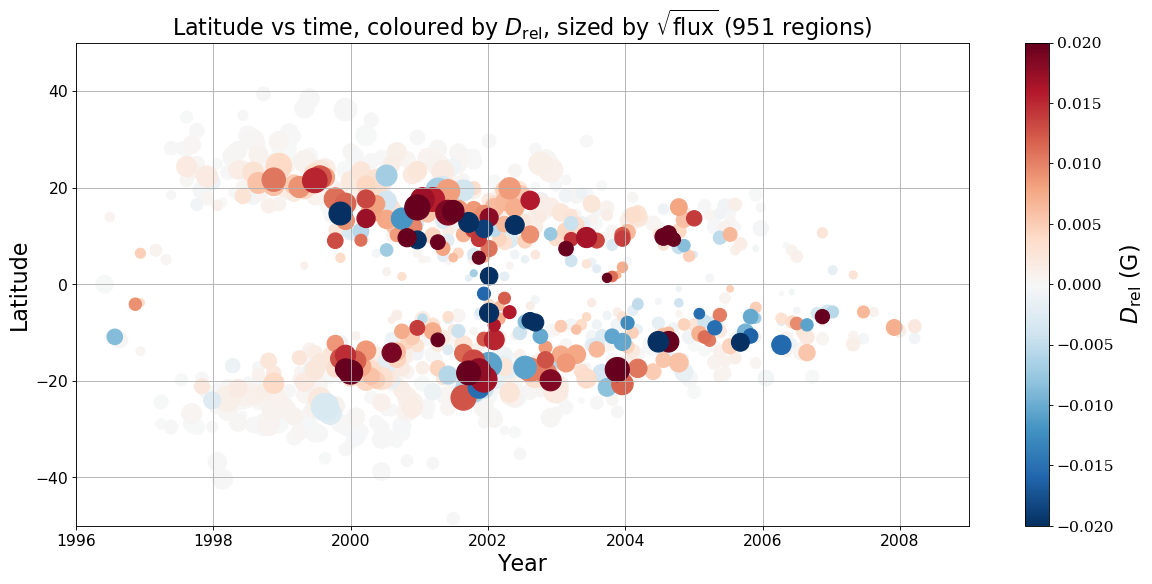

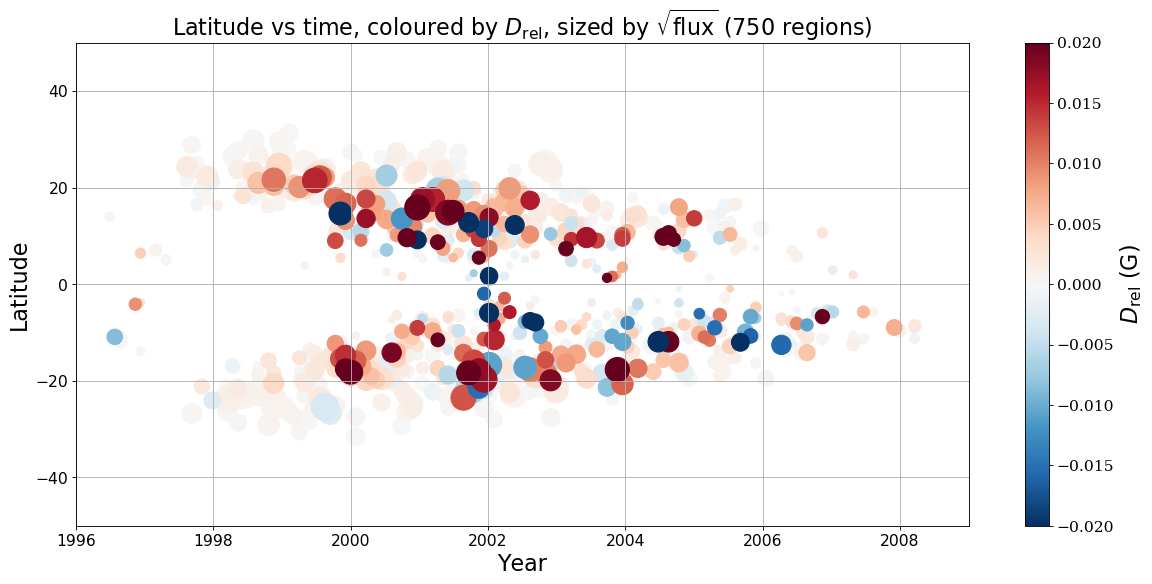

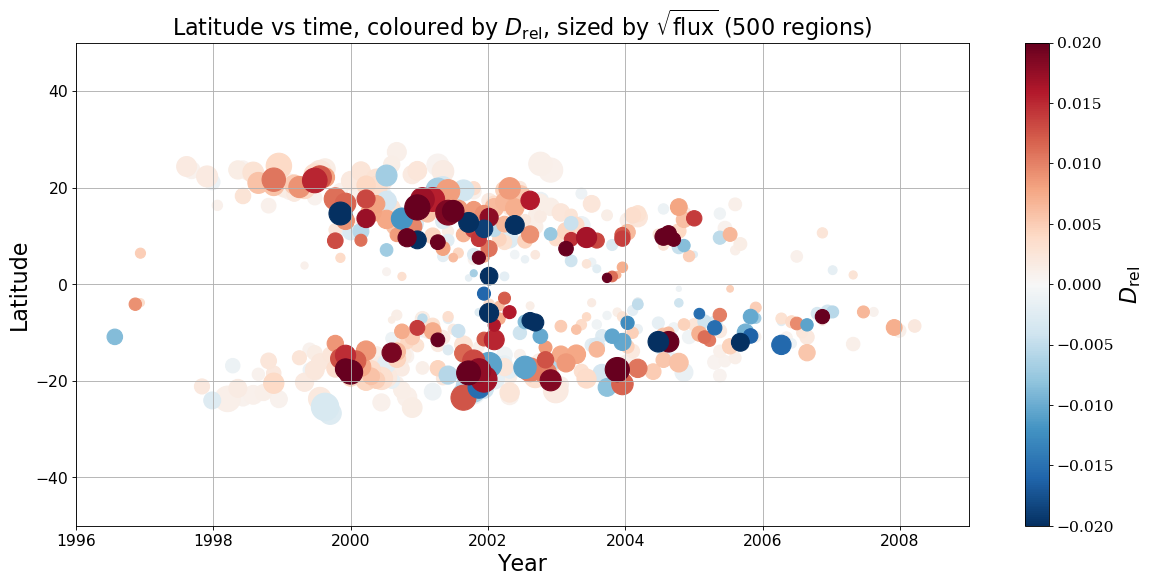

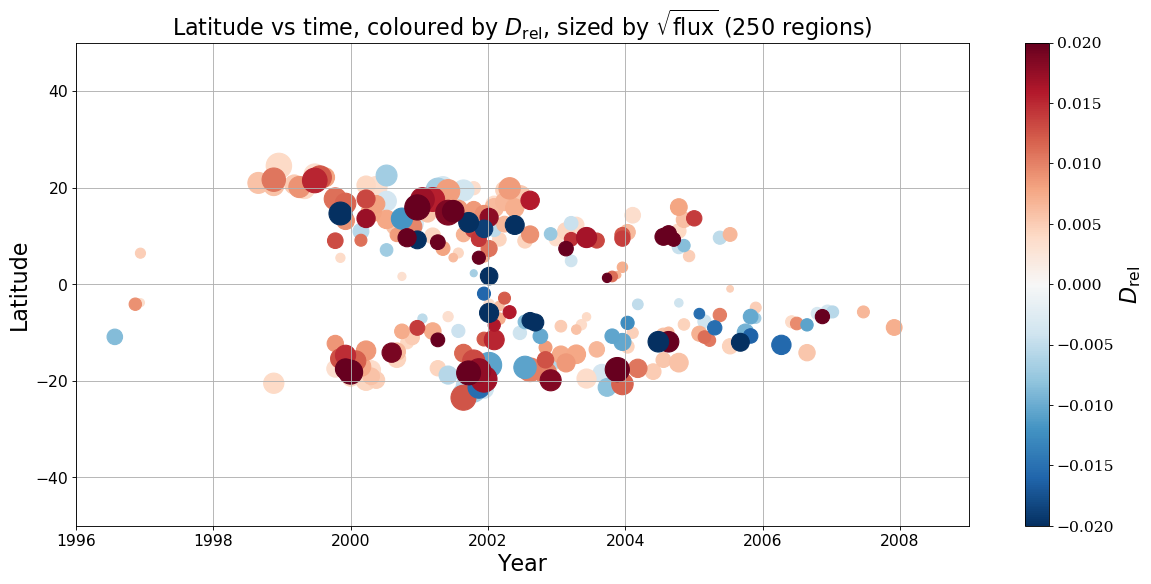

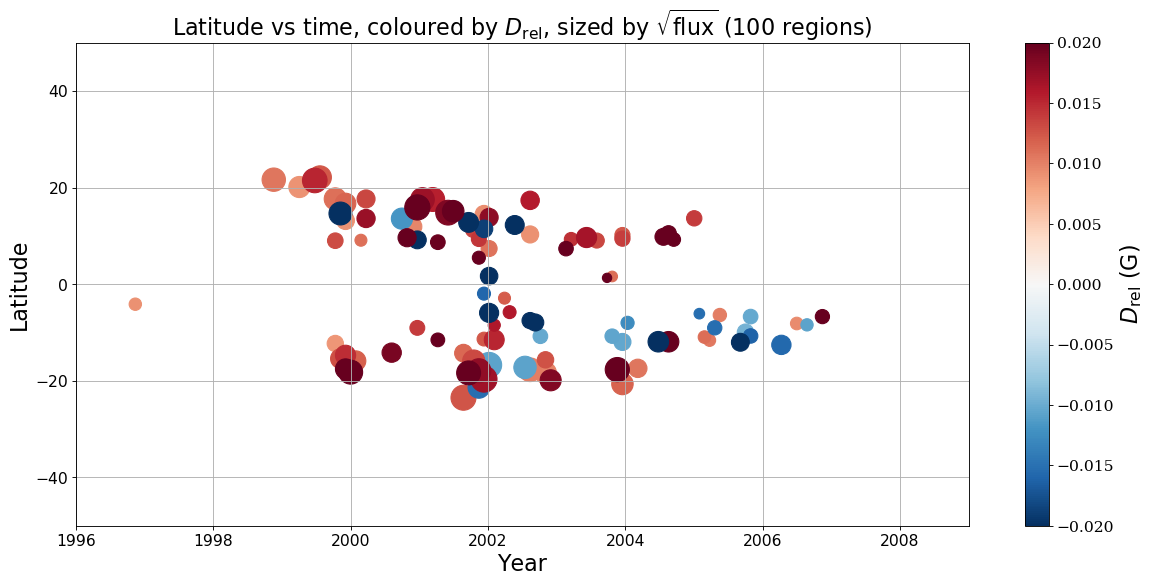

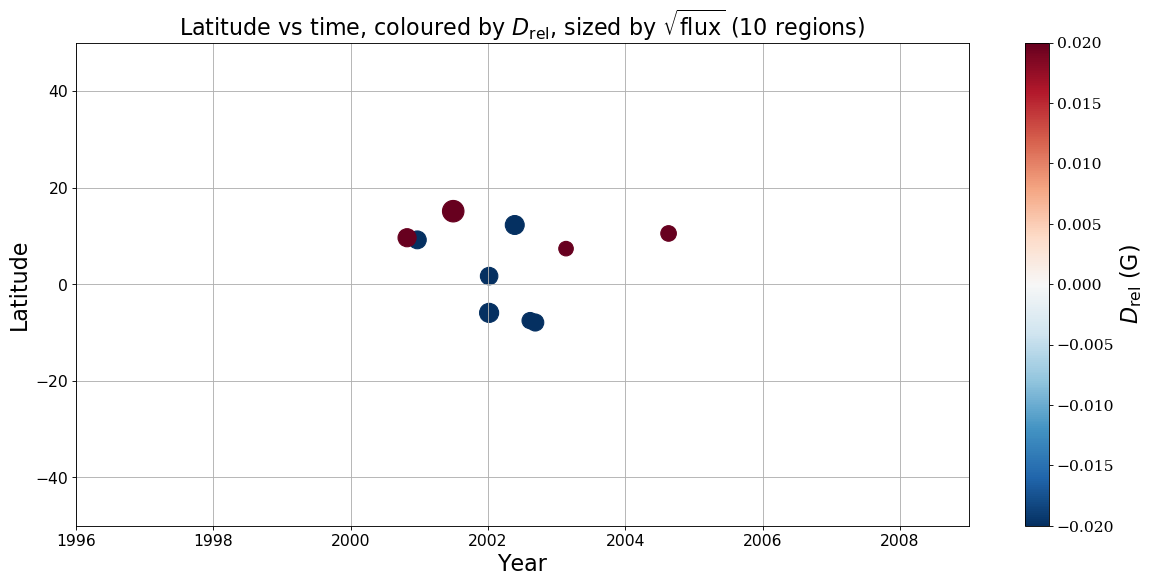

In [9]:
fig2 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3]*27.27+152)/365.25+1996,b[2],200*np.sqrt(abs(b[0])),b[4],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = '$D_{\mathrm{rel}}$ (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1996,2009)
plot = fig2.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by $D_{\mathrm{rel}}$, sized by $\sqrt{\mathrm{flux}}$ (951 regions)',fontsize=20)
plt.grid()
plt.show()


thresh = 7.5e-4;
strong2 = np.asarray(np.where(abs(b[8])>thresh))
weak = np.asarray(np.where(abs(b[8])<thresh))
reg_percent = strong2.size/951*100;
#print(strong2.size)

fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong2]*27.27+152)/365.25+1996,b[2][strong2],200*np.sqrt(abs(b[0][strong2])),b[4][strong2],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = '$D_{\mathrm{rel}}$ (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1996,2009)
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by $D_{\mathrm{rel}}$, sized by $\sqrt{\mathrm{flux}}$ (750 regions)',fontsize=20)
plt.grid()
plt.show()

        
thresh = 3.8504e-3;
strong3 = np.asarray(np.where(abs(b[8])>thresh))
weak = np.asarray(np.where(abs(b[8])<thresh))
reg_percent = strong3.size/951*100;
#print(strong3.size)

fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong3]*27.27+152)/365.25+1996,b[2][strong3],200*np.sqrt(abs(b[0][strong3])),b[4][strong3],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = '$D_{\mathrm{rel}}$'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1996,2009)
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by $D_{\mathrm{rel}}$, sized by $\sqrt{\mathrm{flux}}$ (500 regions)',fontsize=20)
plt.grid()
plt.show()


thresh = 1.6288e-2;
strong4 = np.asarray(np.where(abs(b[8])>thresh))
weak = np.asarray(np.where(abs(b[8])<thresh))
reg_percent = strong4.size/951*100;
#print(strong4.size)

fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong4]*27.27+152)/365.25+1996,b[2][strong4],200*np.sqrt(abs(b[0][strong4])),b[4][strong4],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = '$D_{\mathrm{rel}}$'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1996,2009)
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by $D_{\mathrm{rel}}$, sized by $\sqrt{\mathrm{flux}}$ (250 regions)',fontsize=20)
plt.grid()
plt.show()


thresh = 4.5e-2;
strong5 = np.asarray(np.where(abs(b[8])>thresh))
weak = np.asarray(np.where(abs(b[8])<thresh))
reg_percent = strong5.size/951*100;
#print(strong5.size)

fig6 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong5]*27.27+152)/365.25+1996,b[2][strong5],200*np.sqrt(abs(b[0][strong5])),b[4][strong5],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = '$D_{\mathrm{rel}}$ (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1996,2009)
plot = fig6.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by $D_{\mathrm{rel}}$, sized by $\sqrt{\mathrm{flux}}$ (100 regions)',fontsize=20)
plt.grid()
plt.show()


thresh = 1.5e-1;
strong6 = np.asarray(np.where(abs(b[8])>thresh))
weak = np.asarray(np.where(abs(b[8])<thresh))
reg_percent = strong6.size/951*100;
#print(strong6.size)

fig6 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong6]*27.27+152)/365.25+1996,b[2][strong6],200*np.sqrt(abs(b[0][strong6])),b[4][strong6],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = '$D_{\mathrm{rel}}$ (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1996,2009)
plot = fig6.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by $D_{\mathrm{rel}}$, sized by $\sqrt{\mathrm{flux}}$ (10 regions)',fontsize=20)
plt.grid()
plt.show()

/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


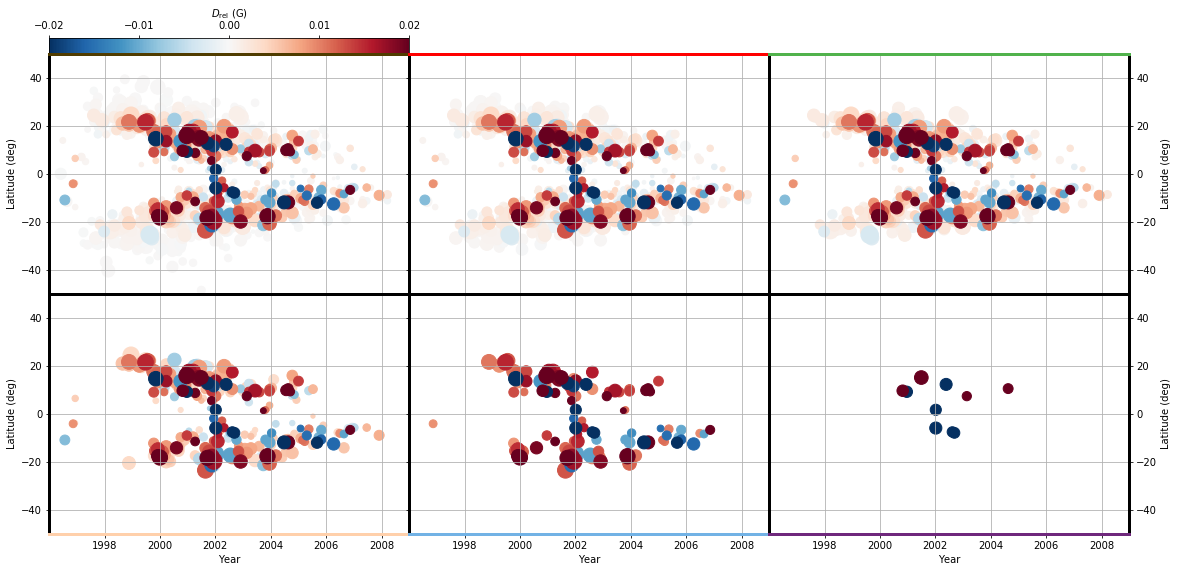

In [10]:
dpi = 300
pxx = 1500  # Horizontal size of each panel
pxy = 1000    # Vertical size of each panel

nph = 2      # Number of horizontal panels
npv = 3      # Number of vertical panels

# Padding
padv  = 200 #Vertical padding in pixels at the edge of figure
padv2 = 0 #Vertical padding in pixels between panels
padh  = 450 #Horizontal padding in pixels at the edge of the figure
padh2 = 0 #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in inches
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in inches

# Conversion to relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszv     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszv    #Horizontal padding between panels in relative units

## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi))


yearticks = np.arange(1998,2010,2)
radmticks = np.arange(-0.02,0.03,0.01)


#Size Factor
szf = 400


# Add colorbar axes
cbaxes1 = fig.add_axes([ppadh, ppadv+pxy/fszv, pxx/fszh, ppadv/3])

# Panel 1
ax1 = fig.add_axes([ppadh, ppadv, pxx/fszh, pxy/fszv])
im1 = ax1.scatter((b[3]*27.27+152)/365.25+1996,b[2],100*np.sqrt(abs(b[0])),b[4],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
ax1.set_xlabel('Year')
ax1.set_xlim(1996,2009)
ax1.set_ylabel('Latitude (deg)')
ax1.tick_params(labelbottom='off')
ax1.grid()

# Panel 2
ax2 = fig.add_axes([ppadh+pxx/fszh, ppadv, pxx/fszh, pxy/fszv], sharey=ax1)
im2 = ax2.scatter((b[3][strong2]*27.27+152)/365.25+1996,b[2][strong2],100*np.sqrt(abs(b[0][strong2])),b[4][strong2],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
ax2.set_xlabel('Year')
ax2.set_xlim(1996,2009)
ax2.set_ylim(-50,50)
ax2.grid()
ax2.tick_params(labelleft='off')
ax2.tick_params(labelbottom='off')


# Panel 3
ax3 = fig.add_axes([ppadh+pxx/fszh*2, ppadv, pxx/fszh, pxy/fszv], sharey=ax1)
im3 = ax3.scatter((b[3][strong3]*27.27+152)/365.25+1996,b[2][strong3],100*np.sqrt(abs(b[0][strong3])),b[4][strong3],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
ax3.grid()
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.set_ylabel('Latitude (deg)')
ax3.tick_params(labelbottom='off')


ax1.set_ylim(-50,50)


# Panel 4
ax4 = fig.add_axes([ppadh, ppadv-pxy/fszv, pxx/fszh, pxy/fszv], sharex=ax1)
im4 = ax4.scatter((b[3][strong4]*27.27+152)/365.25+1996,b[2][strong4],100*np.sqrt(abs(b[0][strong4])),b[4][strong4],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
ax4.set_xlabel('Year')
ax4.set_xlim(1996,2009)
ax4.set_ylabel('Latitude (deg)')
ax4.grid()
ax4.set_xticks(yearticks)

# Panel 5
ax5 = fig.add_axes([ppadh+pxx/fszh, ppadv-pxy/fszv, pxx/fszh, pxy/fszv], sharey=ax4, sharex=ax2)
im5 = ax5.scatter((b[3][strong5]*27.27+152)/365.25+1996,b[2][strong5],100*np.sqrt(abs(b[0][strong5])),b[4][strong5],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
ax5.set_xlabel('Year')
ax5.set_xlim(1996,2009)
ax5.grid()
ax5.tick_params(labelleft='off') 
ax5.set_xticks(yearticks)

# Panel 6
ax6 = fig.add_axes([ppadh+pxx/fszh*2, ppadv-pxy/fszv, pxx/fszh, pxy/fszv], sharey=ax4, sharex=ax3)
im6 = ax6.scatter((b[3][strong6]*27.27+152)/365.25+1996,b[2][strong6],100*np.sqrt(abs(b[0][strong6])),b[4][strong6],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
ax6.set_xlabel('Year')
ax6.set_xlim(1996,2009)
ax6.grid()
ax6.yaxis.tick_right()
ax6.yaxis.set_label_position('right')
ax6.set_ylabel('Latitude (deg)')
ax6.set_xticks(yearticks)



ax4.set_ylim(-50,50)




# Adding Flux Colorbar

cb1 = fig.colorbar(im1,cax=cbaxes1, orientation='horizontal')
cb1.set_label('$D_{\mathrm{rel}}$ (G)')
cb1.set_ticks(radmticks)
cbaxes1.xaxis.tick_top()
cbaxes1.xaxis.set_label_position('top')




# Making Spines Bolder

ax1.spines['bottom'].set_linewidth(3) 
ax1.spines['top'].set_linewidth(3)  
ax1.spines['right'].set_linewidth(3) 
ax1.spines['left'].set_linewidth(3)
ax1.spines['top'].set_color(brown)

ax2.spines['bottom'].set_linewidth(3) 
ax2.spines['top'].set_linewidth(3)  
ax2.spines['right'].set_linewidth(3) 
ax2.spines['left'].set_linewidth(3)
ax2.spines['top'].set_color('red')

ax3.spines['bottom'].set_linewidth(3) 
ax3.spines['top'].set_linewidth(3)  
ax3.spines['right'].set_linewidth(3) 
ax3.spines['left'].set_linewidth(3)
ax3.spines['top'].set_color(green)

ax4.spines['bottom'].set_linewidth(3) 
ax4.spines['top'].set_linewidth(3)  
ax4.spines['right'].set_linewidth(3) 
ax4.spines['left'].set_linewidth(3)
ax4.spines['bottom'].set_color(peach)

ax5.spines['bottom'].set_linewidth(3) 
ax5.spines['top'].set_linewidth(3)  
ax5.spines['right'].set_linewidth(3) 
ax5.spines['left'].set_linewidth(3)
ax5.spines['bottom'].set_color(blue)

ax6.spines['bottom'].set_linewidth(3) 
ax6.spines['top'].set_linewidth(3)  
ax6.spines['right'].set_linewidth(3) 
ax6.spines['left'].set_linewidth(3)
ax6.spines['bottom'].set_color(purple)

#plt.savefig('/home/grads/xsxs53/Documents/phd/Papers/regions_axd/c23_6panel.eps', format='eps', dpi=300,bbox_inches='tight')


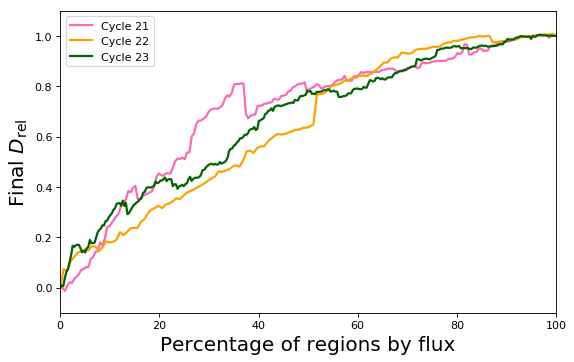

In [19]:
axd_fluxpercent = np.fromfile('axcollect_fluxpercent_realinit.dat',dtype=np.float32)
axd_fluxpercent_c22 = np.fromfile('axcollect_fluxpercent_c22_realinit.dat',dtype=np.float32)
axd_fluxpercent_c21 = np.fromfile('axcollect_fluxpercent_c21.dat',dtype=np.float32)
axd_fluxpercent = np.insert(axd_fluxpercent,0,0)
axd_fluxpercent_c22 = np.insert(axd_fluxpercent_c22,0,0)
axd_fluxpercent_c21 = np.insert(axd_fluxpercent_c21,0,0)

fig7 = plt.figure(figsize=(8,5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(np.arange(0,845,4)*100/844,axd_fluxpercent_c21,color=pink,lw=2,label='Cycle 21')
plt.plot(np.arange(0,847,6)*100/846,axd_fluxpercent_c22,color=orange,lw=2,label='Cycle 22')
plt.plot(np.arange(0,952,3)*100/951,axd_fluxpercent,color='darkgreen',lw=2,label='Cycle 23')
plt.xlim(0,100)
plt.ylim(-0.1,1.1)
plt.xlabel('Percentage of regions by flux',fontsize=18)
plt.ylabel('Final $D_{\mathrm{rel}}$',fontsize=18)
plt.legend()
plt.show()

#plt.savefig('/home/grads/xsxs53/Documents/phd/Papers/regions_axd/reg_percent.eps', format='eps', dpi=300,bbox_inches='tight')

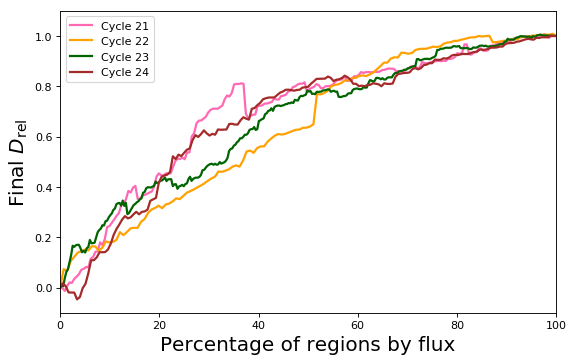

In [20]:
axd_fluxpercent = np.fromfile('axcollect_fluxpercent_realinit.dat',dtype=np.float32)
axd_fluxpercent_c22 = np.fromfile('axcollect_fluxpercent_c22_realinit.dat',dtype=np.float32)
axd_fluxpercent_c21 = np.fromfile('axcollect_fluxpercent_c21.dat',dtype=np.float32)
axd_fluxpercent_c24 = np.fromfile('axcollect_fluxpercent_c24_threecycles.dat',dtype=np.float32)
axd_fluxpercent = np.insert(axd_fluxpercent,0,0)
axd_fluxpercent_c22 = np.insert(axd_fluxpercent_c22,0,0)
axd_fluxpercent_c21 = np.insert(axd_fluxpercent_c21,0,0)
axd_fluxpercent_c24 = np.insert(axd_fluxpercent_c24,0,0)

fig7 = plt.figure(figsize=(8,5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(np.arange(0,845,4)*100/844,axd_fluxpercent_c21,color=pink,lw=2,label='Cycle 21')
plt.plot(np.arange(0,847,6)*100/846,axd_fluxpercent_c22,color=orange,lw=2,label='Cycle 22')
plt.plot(np.arange(0,952,3)*100/951,axd_fluxpercent,color='darkgreen',lw=2,label='Cycle 23')
plt.plot(np.arange(0,529,3)*100/528,axd_fluxpercent_c24,color='brown',lw=2,label='Cycle 24')
plt.xlim(0,100)
plt.ylim(-0.1,1.1)
plt.xlabel('Percentage of regions by flux',fontsize=18)
plt.ylabel('Final $D_{\mathrm{rel}}$',fontsize=18)
plt.legend()
plt.show()

#plt.savefig('/home/grads/xsxs53/Documents/phd/Papers/regions_axd/reg_percent.eps', format='eps', dpi=300,bbox_inches='tight')